# Preparing Bell state using VQE

__By performing bell basis measurement one can discriminate between two bell states. In general it's not possible to discriminate all the 4 bell states using LOCC__

In [12]:
#Import libraries
import numpy as np
from scipy.optimize import minimize
from pyquil import Program, get_qc
import pyquil.api as api
from pyquil.gates import *
qvm = api.QVMConnection()
from grove.pyvqe.vqe import VQE
from math import pi
import warnings
warnings.filterwarnings('ignore')

__Define the Hamiltonian__

In [2]:
# Define the matrix
from pyquil.paulis import PauliSum, PauliTerm
Ham = PauliSum([PauliTerm.from_list([("Z", 1), ("Z", 0)], coefficient=-1)])

__Choose ansatz__

In [112]:
num_qubit=2 
depth=1

# ansatz
def ansatz(theta):
    p = Program()
    p+=H(0)
    p+=H(0)
    k=0
    for i in range(depth):
        for l in range(num_qubit):
               p+=CNOT(0,1)
               p+=RY(-pi/2, 1)
               p+=RX(theta[k], 1)
               p+=RY(pi/2, 1)
               p+=CNOT(0,1)
        p+=RX(1-theta[k], 0)
        p+=RX(1-theta[k], 1)
        k=k+1
    return p

__Optimization with VQE__

In [4]:
# Minimize and get approximate of the lowest eigenvalue
from grove.pyvqe.vqe import VQE
#qc = get_qc('2q-qvm')
vqe = VQE(minimizer=minimize, minimizer_kwargs={'method': 'nelder-mead','options': {'xatol': 1.0e-2}})

__Running the program without sample size__

In [11]:
np.random.seed(345)
initial_params = np.random.uniform(0.0, 2*np.pi, size=num_qubit)
result = vqe.vqe_run(ansatz, Ham, initial_params)
print(result)

                     models will be ineffective
{'x': array([1.57286165, 4.71468267]), 'fun': -0.9999955806405167}


__Running the program with sample size=1000__

In [23]:
np.random.seed(345)
initial_params = np.random.uniform(0.0, 2*np.pi, size=num_qubit)
result = vqe.vqe_run(ansatz, Ham, initial_params, samples=1000)
print(result)

{'x': array([1.84227705, 4.93542615]), 'fun': -0.978}


__sample size=100__

In [14]:
np.random.seed(345)
initial_params = np.random.uniform(0.0, 2*np.pi, size=num_qubit)
result = vqe.vqe_run(ansatz, Ham, initial_params, samples=100)
print(result)

{'x': array([2.14721453, 5.04885715]), 'fun': -0.9400000000000001}


__sample size=10__

In [17]:
np.random.seed(345)
initial_params = np.random.uniform(0.0, 2*np.pi, size=num_qubit)
result = vqe.vqe_run(ansatz, Ham, initial_params, samples=10)
print(result)

{'x': array([2.3888665 , 4.28203057]), 'fun': -1.0}


__sample size=1__

In [20]:
np.random.seed(345)
initial_params = np.random.uniform(0.0, 2*np.pi, size=num_qubit)
result = vqe.vqe_run(ansatz, Ham, initial_params, samples=1)
print(result)

{'x': array([2.33060146, 4.1775908 ]), 'fun': -1.0}


__Variational Circuit__

In [25]:
print(ansatz(result.x))

H 0
H 0
CNOT 0 1
RY(-pi/2) 1
RX(1.8422770453041926) 1
RY(pi/2) 1
CNOT 0 1
CNOT 0 1
RY(-pi/2) 1
RX(1.8422770453041926) 1
RY(pi/2) 1
CNOT 0 1
RX(-0.8422770453041926) 0
RX(-0.8422770453041926) 1
CNOT 0 1
RY(-pi/2) 1
RX(4.935426151871976) 1
RY(pi/2) 1
CNOT 0 1
CNOT 0 1
RY(-pi/2) 1
RX(4.935426151871976) 1
RY(pi/2) 1
CNOT 0 1
RX(-3.935426151871976) 0
RX(-3.935426151871976) 1



__Here Hadamard gate is used, which can be constructed using Rx and Ry gates with constant parameters__

__For depth=1 we can loop over a range of these angles and plot the expectation value__

In [40]:
num_qubit=2 
depth=1

# ansatz
def ansatz(theta):
    p = Program()
    p+=H(0)
    p+=H(0)
    k=0
    for i in range(depth):
        for l in range(num_qubit):
               p+=CNOT(0,1)
               p+=RY(-pi/2, 1)
               p+=RX(theta[k], 1)
               p+=RY(pi/2, 1)
               p+=CNOT(0,1)
        p+=RX(1-theta[k], 0)
        p+=RX(1-theta[k], 1)
        k=k+1
    return p

In [41]:
vqe_inst = VQE(minimizer=minimize, minimizer_kwargs={'method': 'nelder-mead'})

In [56]:
angle_range = np.linspace(0.0, 2 * np.pi, 50)
data = [vqe_inst.expectation(ansatz([angle]), Ham, None, qvm) for angle in angle_range]

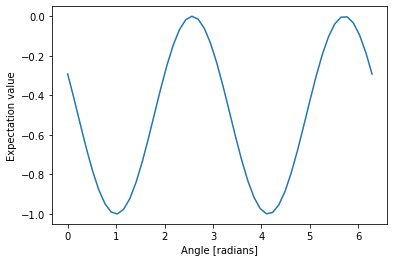

In [57]:
import matplotlib.pyplot as plt 
plt.xlabel('Angle [radians]') 
plt.ylabel('Expectation value') 
plt.plot(angle_range, data) 
plt.show()

__<font size="4">The expectation value $\approx -1$ (depth=1, sample=None)</font>__

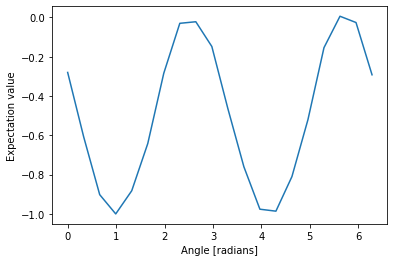

In [73]:
import warnings
warnings.filterwarnings('ignore')
angle_range = np.linspace(0.0, 2 * np.pi, 20)
data = [vqe_inst.expectation(ansatz([angle]), Ham, 1000, qvm) for angle in angle_range]
import matplotlib.pyplot as plt 
plt.xlabel('Angle [radians]') 
plt.ylabel('Expectation value') 
plt.plot(angle_range, data) 
plt.show()

__<font size="4">The expectation value $\approx -1$ (depth=1, sample=1000)</font>__

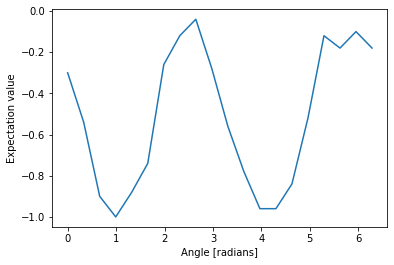

In [81]:
angle_range = np.linspace(0.0, 2 * np.pi, 20)
data = [vqe_inst.expectation(ansatz([angle]), Ham, 100, qvm) for angle in angle_range]
import matplotlib.pyplot as plt 
plt.xlabel('Angle [radians]') 
plt.ylabel('Expectation value') 
plt.plot(angle_range, data) 
plt.show()

__<font size="4">The expectation value $\approx -1$ (depth=1, sample=100)</font>__ 

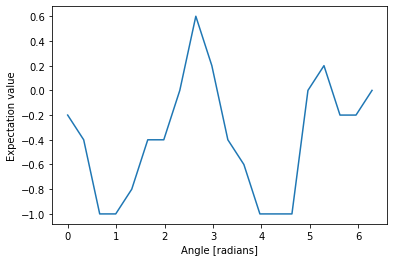

In [97]:
angle_range = np.linspace(0.0, 2 * np.pi, 20)
data = [vqe_inst.expectation(ansatz([angle]), Ham, 10, qvm) for angle in angle_range]
import matplotlib.pyplot as plt 
plt.xlabel('Angle [radians]') 
plt.ylabel('Expectation value') 
plt.plot(angle_range, data) 
plt.show()

__<font size="4">The expectation value $\approx -1$ (depth=1, sample=10)</font>__ 

## Running VQE under noise

In [131]:
pauli_channel = [0.01, 0.01, 0.01]
noisy_qvm = api.QVMConnection(gate_noise=pauli_channel)

In [132]:
initial_angle = [0.5]
vqe_inst.minimizer_kwargs = {'method': 'Nelder-mead', 'options': {'initial_simplex': np.array([[0.0], [0.05]]), 'xatol': 1.0e-2}}
result = vqe_inst.vqe_run(ansatz, Ham, initial_angle, samples=1000, qvm=noisy_qvm)

In [134]:
print(result)

{'x': array([-1.86264515e-10]), 'fun': -0.274}
